In [1]:
#importing libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#Keras provides a handwritten dataset 
# data set loading (test,training) 

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

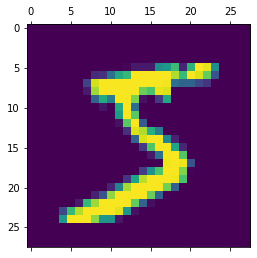

In [3]:
#Data sample
plt.matshow(X_train[0])
X_train[0]


In [5]:
#data dimension 
len_train,r_train,c_train = X_train.shape
len_test,r_test,c_test = X_test.shape

#reshape to fit into the model 
X_train_flattened = X_train.reshape(len(X_train), r_train*c_train)
X_test_flattened = X_test.reshape(len(X_test), r_test*c_test)
print(X_train.shape)
print(X_train_flattened.shape)
print(X_test.shape)
print(X_test_flattened.shape) 

(60000, 28, 28)
(60000, 784)
(10000, 28, 28)
(10000, 784)


In [6]:
#reshaped data 
X_train_flattened[0]


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
#feature scaling using MinMax
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.fit_transform(X_test_flattened)

In [8]:
# Neural Network 
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 928us/step - loss: 0.7251 - accuracy: 0.8093
Epoch 2/10
1875/1875 [==============================] - 2s 895us/step - loss: 0.3165 - accuracy: 0.9117
Epoch 3/10
1875/1875 [==============================] - 2s 954us/step - loss: 0.2852 - accuracy: 0.9206
Epoch 4/10
1875/1875 [==============================] - 2s 972us/step - loss: 0.2721 - accuracy: 0.9229
Epoch 5/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.2679 - accuracy: 0.9250
Epoch 6/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.2538 - accuracy: 0.9290
Epoch 7/10
1875/1875 [==============================] - 2s 970us/step - loss: 0.2531 - accuracy: 0.9290
Epoch 8/10
1875/1875 [==============================] - 2s 956us/step - loss: 0.2542 - accuracy: 0.9282
Epoch 9/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.2531 - accuracy: 0.9294
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/

In [9]:
# Accuracy % test   
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 774us/step - loss: 0.2623 - accuracy: 0.9273


[0.26227205991744995, 0.927299976348877]

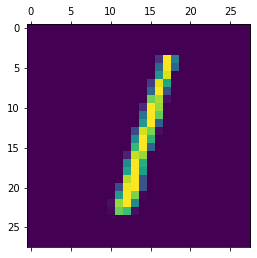

In [19]:
#manual test
nd = 2
plt.matshow(X_test[nd])


In [20]:
# manual test
y_predicted = model.predict(X_test_flattened)
print("output layer", y_predicted[nd])
print("correspanding value",np.argmax(y_predicted[nd]))

output layer [1.13786329e-04 9.95355129e-01 7.17040181e-01 2.57771462e-01
 2.11845040e-02 1.09974444e-01 1.41517520e-01 3.91576588e-02
 3.40285301e-01 3.70053351e-02]
correspanding value 1


Text(69.0, 0.5, 'Truth')

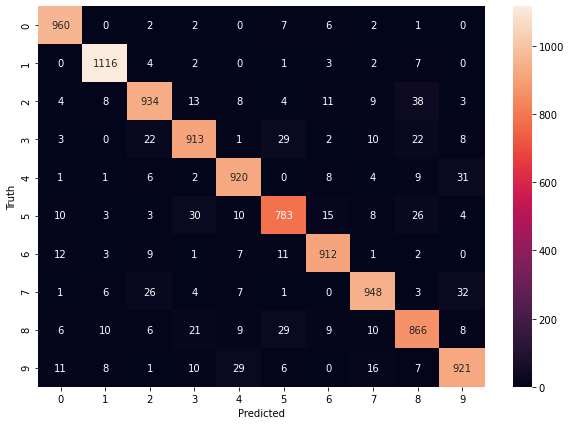

In [16]:
#confusion matrix
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')